In [5]:
import pandas as pd
df = pd.read_csv(r'C:\Users\LENOVO\Desktop\Python\Internshala\Py_Stats_ZScore_VS_ZTest_JPMorgan\The Goldman Sachs - The Goldman Sachs.csv')
display(df)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/2000,$94.19,$94.38,$87.75,$88.31,$65.69,"$1,822,600.00"
1,1/4/2000,$87.00,$87.50,$82.25,$82.75,$61.55,"$1,647,700.00"
2,1/5/2000,$80.88,$81.88,$78.38,$78.88,$58.67,"$1,516,600.00"
3,1/6/2000,$78.63,$84.50,$78.63,$82.25,$61.18,"$1,845,100.00"
4,1/7/2000,$83.06,$83.19,$79.88,$82.56,$61.41,"$1,127,400.00"
...,...,...,...,...,...,...,...
5858,4/17/2023,$336.00,$340.45,$333.68,$339.68,$339.68,"$3,012,100.00"
5859,4/18/2023,$328.00,$336.55,$326.13,$333.91,$333.91,"$7,549,500.00"
5860,4/19/2023,$332.98,$336.99,$331.67,$336.89,$336.89,"$2,625,400.00"
5861,4/20/2023,$334.95,$339.31,$334.32,$338.71,$338.71,"$2,217,900.00"


In [6]:
# checking data types
df.dtypes

Date         object
Open         object
High         object
Low          object
Close        object
Adj Close    object
Volume       object
dtype: object

In [7]:
# making a function to clean the symbols $ and ,
def clean(data):
    import re
    for i in data:
        data[i] = data[i].apply(lambda x: re.sub(r'[\$,]', '', x))
    return data
        
        

In [8]:
# making a function to convert dtpe to float 
def change(data):
    for i in data:
        if i == 'Date':
            continue
        data[i] = data[i].astype(float)
    return data

In [9]:
clean(df)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/2000,94.19,94.38,87.75,88.31,65.69,1822600.00
1,1/4/2000,87.00,87.50,82.25,82.75,61.55,1647700.00
2,1/5/2000,80.88,81.88,78.38,78.88,58.67,1516600.00
3,1/6/2000,78.63,84.50,78.63,82.25,61.18,1845100.00
4,1/7/2000,83.06,83.19,79.88,82.56,61.41,1127400.00
...,...,...,...,...,...,...,...
5858,4/17/2023,336.00,340.45,333.68,339.68,339.68,3012100.00
5859,4/18/2023,328.00,336.55,326.13,333.91,333.91,7549500.00
5860,4/19/2023,332.98,336.99,331.67,336.89,336.89,2625400.00
5861,4/20/2023,334.95,339.31,334.32,338.71,338.71,2217900.00


In [10]:
change(df)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/2000,94.19,94.38,87.75,88.31,65.69,1822600.0
1,1/4/2000,87.00,87.50,82.25,82.75,61.55,1647700.0
2,1/5/2000,80.88,81.88,78.38,78.88,58.67,1516600.0
3,1/6/2000,78.63,84.50,78.63,82.25,61.18,1845100.0
4,1/7/2000,83.06,83.19,79.88,82.56,61.41,1127400.0
...,...,...,...,...,...,...,...
5858,4/17/2023,336.00,340.45,333.68,339.68,339.68,3012100.0
5859,4/18/2023,328.00,336.55,326.13,333.91,333.91,7549500.0
5860,4/19/2023,332.98,336.99,331.67,336.89,336.89,2625400.0
5861,4/20/2023,334.95,339.31,334.32,338.71,338.71,2217900.0


In [11]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

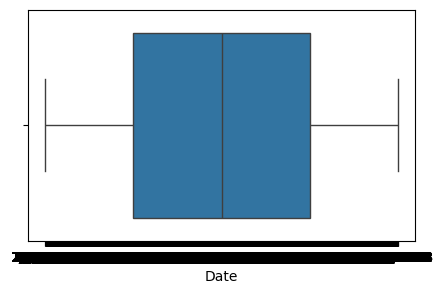

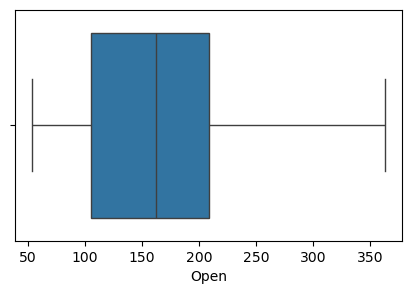

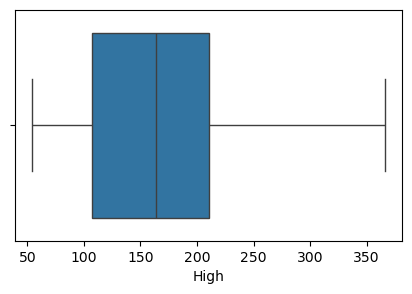

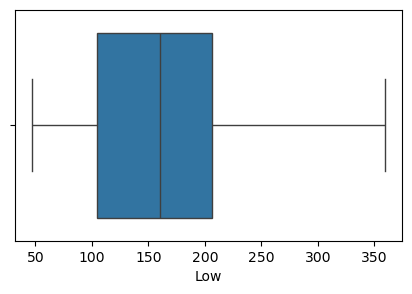

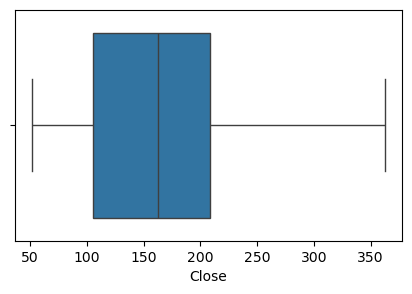

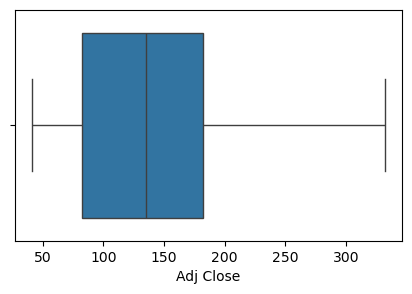

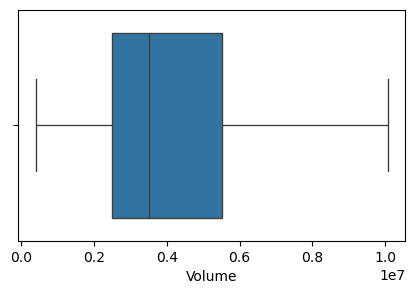

In [31]:
#checking outliers
import matplotlib.pyplot as plt
import seaborn as sns

for i in df.columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[i])
    plt.show()

In [13]:
# creating function to treat outliers
def treat_outiers(f):
    import numpy as np
    for i in f.columns:
        if df[i].dtype == 'float64':
            Q1 =  f[i].quantile(0.25)
            Q3 = f[i].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5*IQR
            upper_bound = Q3 + 1.5*IQR
            f[i] = np.where(f[i] < lower_bound, lower_bound, np.where(f[i] > upper_bound, upper_bound, f[i]))
    return f

In [14]:
treat_outiers(df)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/2000,94.19,94.38,87.75,88.31,65.6900,1822600.0
1,1/4/2000,87.00,87.50,82.25,82.75,61.5500,1647700.0
2,1/5/2000,80.88,81.88,78.38,78.88,58.6700,1516600.0
3,1/6/2000,78.63,84.50,78.63,82.25,61.1800,1845100.0
4,1/7/2000,83.06,83.19,79.88,82.56,61.4100,1127400.0
...,...,...,...,...,...,...,...
5858,4/17/2023,336.00,340.45,333.68,339.68,331.7975,3012100.0
5859,4/18/2023,328.00,336.55,326.13,333.91,331.7975,7549500.0
5860,4/19/2023,332.98,336.99,331.67,336.89,331.7975,2625400.0
5861,4/20/2023,334.95,339.31,334.32,338.71,331.7975,2217900.0


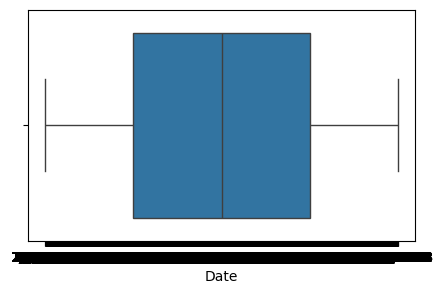

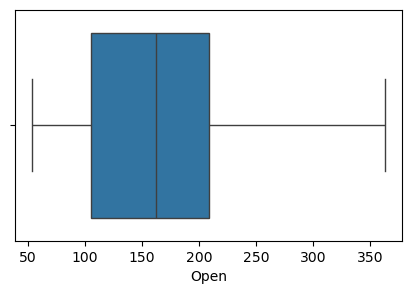

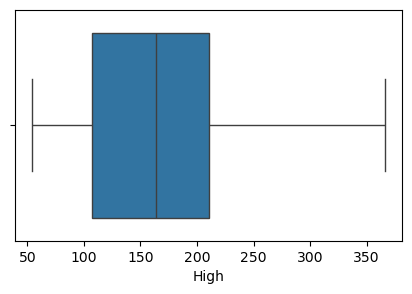

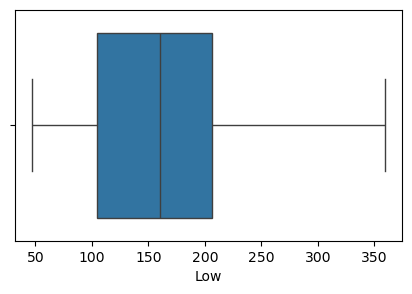

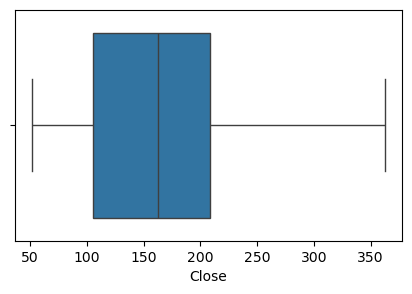

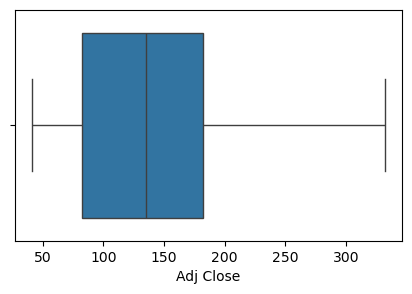

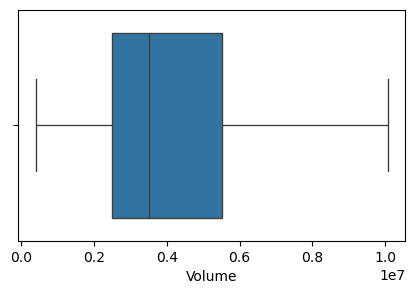

In [15]:
#checking outliers
import matplotlib.pyplot as plt
import seaborn as sns

for i in df.columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[i])
    plt.show()

In [16]:
# spliting the data into 70/30

from sklearn.model_selection import train_test_split
# sepearting dependant and independant variables
x = df.drop(['Adj Close', 'Date'], axis=1)
y = df['Adj Close']

# I will split the data into 70% training 30 % testing 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4104, 5)
(1759, 5)
(4104,)
(1759,)


In [17]:
# scaling the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_stand = sc.fit_transform(x_train)
x_test_stand  = sc.transform(x_test)

In [18]:
# training the model
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5, weights='uniform')
knn.fit(x_train_stand, y_train)

KNeighborsRegressor()

In [19]:
# lets check can it predit well or not

y_predict = knn.predict(x_test_stand)

In [20]:
#checking scores
print(knn.score(x_train_stand,y_train))
print(knn.score(x_test_stand,y_test))

0.9964318831460154
0.9950747576815218


In [21]:
# checking r2, mae, rmse, mse

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

print('R² is:', r2_score(y_test, y_predict))
print('Mean squared error:', mean_squared_error(y_test, y_predict))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, y_predict)))
print('Mean absolute error:', mean_absolute_error(y_test, y_predict))

R² is: 0.9950747576815218
Mean squared error: 28.773003971574763
Root mean squared error: 5.364047349863232
Mean absolute error: 3.262906196702672


In [22]:
# Adjusted R square = 1 - (1-R2) * (N-1) / N - p -1 

n = x_train_stand.shape[0] + x_test_stand.shape[0]  # n is total data/rows
p = x_train_stand.shape[1]  # p is total indepedent variable

Adjusted_R_square = 1 - (1- r2_score(y_test, y_predict)) * (n - 1) / (n - p - 1)
print(Adjusted_R_square)

0.9950705531038212


In [23]:
import pandas as pd

difference = pd.DataFrame({'Predicted Values':y_predict, 'Actual Values':y_test})
difference.head(15)

,Predicted Values,Actual Values
1091,76.9660,71.48
365,66.8320,65.20
4814,177.5240,178.28
2193,99.7660,99.51
4413,176.7900,198.66
2198,103.6680,101.86
4331,192.3440,205.27
3678,151.7140,149.37
67,77.8240,76.35
4984,192.1340,194.82


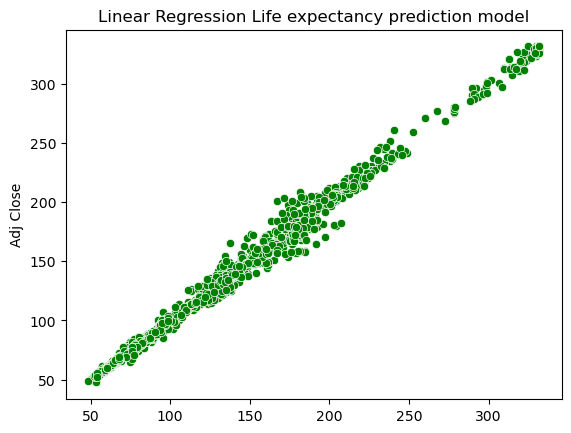

In [24]:
#plotting the data to check if its forming a good best fit line
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x=y_predict, y=y_test, color='green') 
plt.title('Linear Regression Life expectancy prediction model')
plt.show()

In [25]:
# saving my model as pkl file to deploy it
import pickle
with open('knn.pkl', 'wb') as f:
    pickle.dump(knn, f)

In [26]:
import os
os.getcwd()

'C:\\Users\\LENOVO\\Desktop\\Machine learning\\KNN'

In [27]:
#changing directory

os.chdir(r'C:\Users\LENOVO\Desktop\Machine learning\KNN')
os.getcwd()


'C:\\Users\\LENOVO\\Desktop\\Machine learning\\KNN'

In [28]:
#loading pkl
with open(r'C:\Users\LENOVO\Desktop\Machine learning\KNN\knn.pkl', 'rb') as f:
    model = pickle.load(f)
print('succesfully loaded')
    

succesfully loaded


In [29]:
# seeing prediction
model.predict(x_test_stand)

array([ 76.966,  66.832, 177.524, ...,  68.112,  60.404, 143.082])

In [30]:
#training pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import pickle  
from sklearn.model_selection import train_test_split

x = df.drop(['Adj Close', 'Date'], axis=1)
y = df['Adj Close']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


pipe = Pipeline([('scaler', StandardScaler()),('knn', KNeighborsRegressor(n_neighbors=5, weights='uniform'))])
pipe.fit(x_train, y_train)

with open('knn_pipeline.pkl', 'wb') as f:
    pickle.dump(pipe, f)
print('Saved pipeline')


(4104, 5)
(1759, 5)
(4104,)
(1759,)
Saved pipeline
